# 图像特效-LOMO效果

In [14]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [15]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [16]:
def smooth_light(img,mixPixel):
    imgf = np.float32(img)
    res = np.zeros_like(imgf)
    
    if mixPixel > 128:
        res =  ((imgf + (mixPixel + mixPixel - 255.0) * ((np.sqrt(imgf / 255.0)) * 255.0 - imgf) / 255.0))
    else:
        res = ((imgf + (mixPixel + mixPixel - 255.0) * (imgf - imgf * imgf / 255.0) / 255.0))
    
    res = np.clip(res,0,255)
    return np.uint8(res)

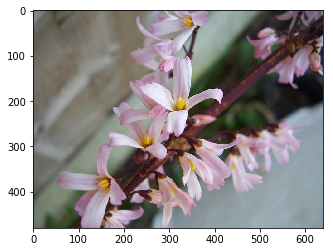

In [17]:
dst = smooth_light(rgb,148)
plt.imshow(dst)

In [18]:
def color_mix(img,mixPixel):
    imgf = np.float32(img)
    res = np.zeros_like(imgf)
    res[:,:,0] = (mixPixel[0] + imgf[:,:,0]) - mixPixel[0] * imgf[:,:,0] / 128.0
    res[:,:,1] = (mixPixel[1] + imgf[:,:,1]) - mixPixel[1] * imgf[:,:,1] / 128.0
    res[:,:,2] = (mixPixel[2] + imgf[:,:,2]) - mixPixel[2] * imgf[:,:,2] / 128.0
    res = np.clip(res,0,255)
    return np.uint8(res)

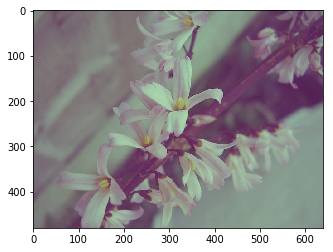

In [20]:
dst = color_mix(dst,(5,15,80))
plt.imshow(dst)